# **Exemplo: Método de Newton em R**

Aqui consta um exemplo de aplicação do Método de Newton para encontrar a raiz de uma função $f: \mathbb{R} \rightarrow \mathbb{R}$ não linear, que no caso é 
$$
  f(x) = \cos(x) - x^3
$$

Uma interpretação equivalente é resolver a equação não linear
$$
  \cos(x) = x^3
$$

Partiremos do ponto inicial $p^{(0)} = 3/4$, e usaremos as versões analíticas das derivações de $f$. Sabemos também que a solução é algo próximo de 0.86547403310161444662.

In [15]:
from math import sin, cos

f   = lambda x: cos(x) - x**3     #   f(x)
f_  = lambda x: -sin(x) - 3*x**2  #  f'(x)
f__ = lambda x: -cos(x) - 6*x     # f''(x)

p0 = 3/4
sol = 0.86547403310161444662

O Método de Newton para funções de uma única variável consiste no seguinte:
$$
  p^{(i+1)} = p^{(i)} - \dfrac{f(p^{(i)})}{f'(p^{(i)})}
$$

In [16]:
def newton (p0, f, f_p0): return p0 - f(p0)/f_p0

É importante também medirmos o erro real e o erro estimado para verificar a teoria de convergência quadrática.

Primeiramente, podemos ver que a condição $M | e_0 | < 1$. Para isso, considere que estamos pensando no intervalo $(0.5,1)$ e que, então, já que tomamos $p^{(0)} = 3/4$, no pior dos casos $e_0 = 1/4$. Assim:

In [17]:
e_0 = 1/4
M = abs(f__(1))/(2*abs(f_(.5)))
print(M * abs(e_0))

0.6649754397990529


Então está garantido $M | e_0 | < 1$. Podemos ir aos erros.

In [18]:
e_n = e_0
erro_absoluto, erro_estimado = [], []
x0 = p0
pontos=[]
for i in range(5):
  # aplica o método
  p0 = newton(p0, f, f_(p0))
  pontos.append([p0,f(p0)])

  # erro absoluto
  erro_absoluto.append(abs(sol - p0))

  # erro estimado
  erro_estimado.append(M * e_n**2)
  e_n = erro_estimado[-1]

from auxiliares.exibir import exibir

tabela = exibir(['n', 'absoluto', 'estimativa'], [
  [i for i in range(len(erro_absoluto))],
  erro_absoluto,
  erro_estimado
])
pontos = list(zip(*pontos))

   n |    absoluto |   estimativa
-----+-------------+--------------
   0 | 0.0152966   |  0.166244
   1 | 0.000222566 |  0.0735118
   2 | 4.80725e-08 |  0.0143741
   3 | 2.33147e-15 |  0.000549571
   4 | 0           |  8.03367e-07


ValueError: Unrecognized marker style (0.8654740331016144, 1.1102230246251565e-16)

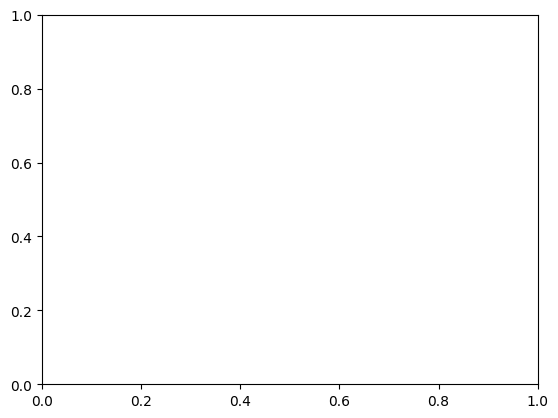

In [21]:
import matplotlib.pyplot as plt
plt.scatter(*pontos)